In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re
import requests  # for API calls
import time
import missingno as msno


# Data Understanding

In [27]:
# Load the dataset
original_data = pd.read_csv('Data_202425.csv')

# Create a copy
data = original_data.copy()

# Convert date columns to datetime
data['ico_start'] = pd.to_datetime(data['ico_start'], format='%d/%m/%Y', errors='coerce')
data['ico_end'] = pd.to_datetime(data['ico_end'], format='%d/%m/%Y', errors='coerce')

# Display the first few rows of the dataset
data.head()


,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,2020-08-10,2020-12-31,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,2020-08-01,2020-12-31,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,2019-03-01,2020-12-31,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,2020-06-25,2021-01-31,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaT,NaT,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


## EDA

C:\Users\luish\AppData\Local\Temp\ipykernel_20208\1945686915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='success', palette='Set2')


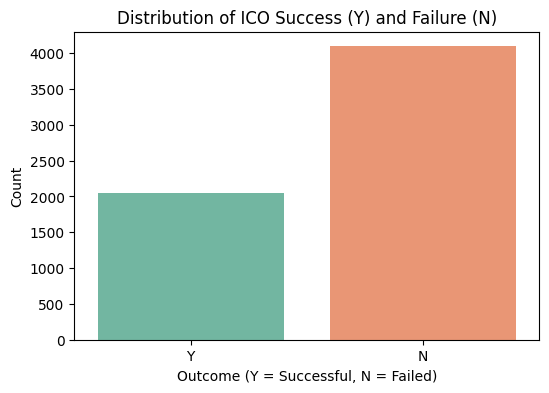

In [28]:
# Plot the distribution of the "Outcome of the ICO"
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='success', palette='Set2')
plt.title('Distribution of ICO Success (Y) and Failure (N)')
plt.xlabel('Outcome (Y = Successful, N = Failed)')
plt.ylabel('Count')
plt.show()


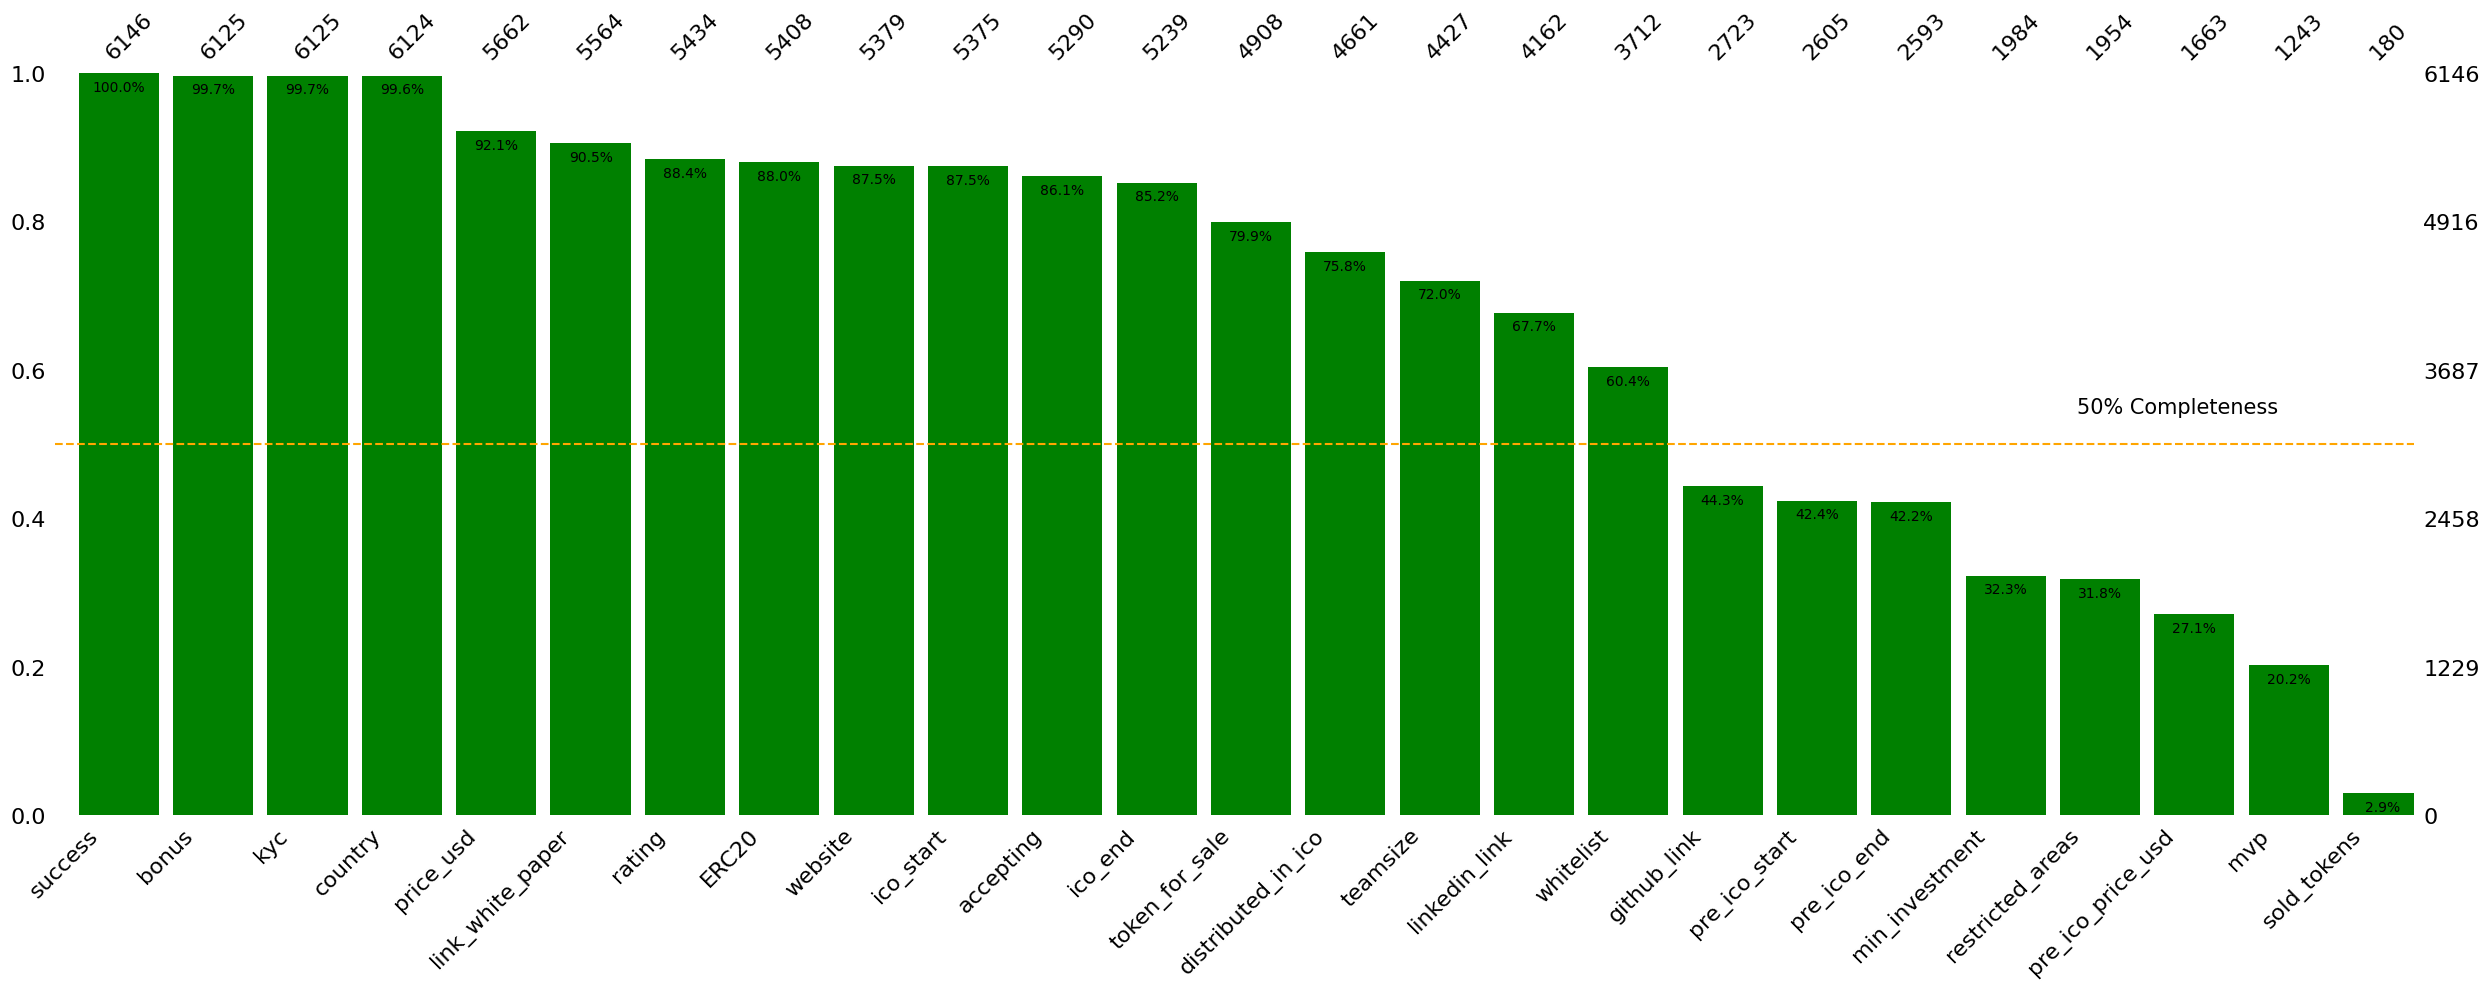

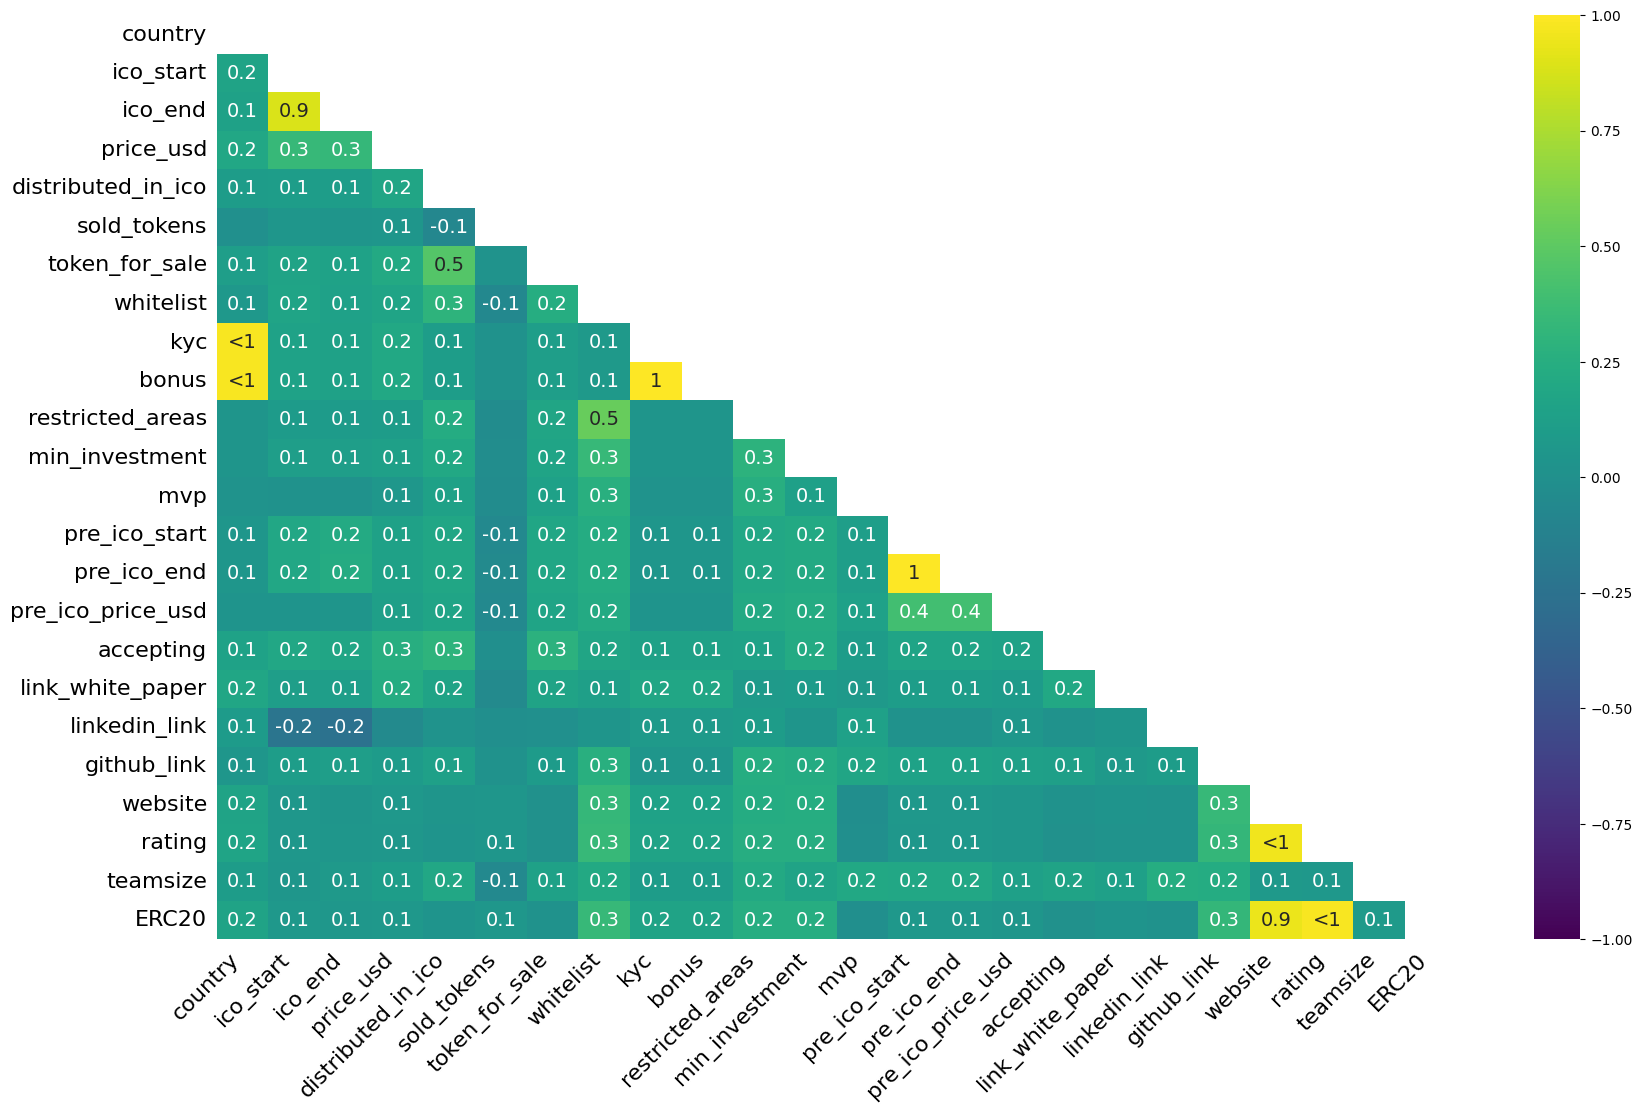

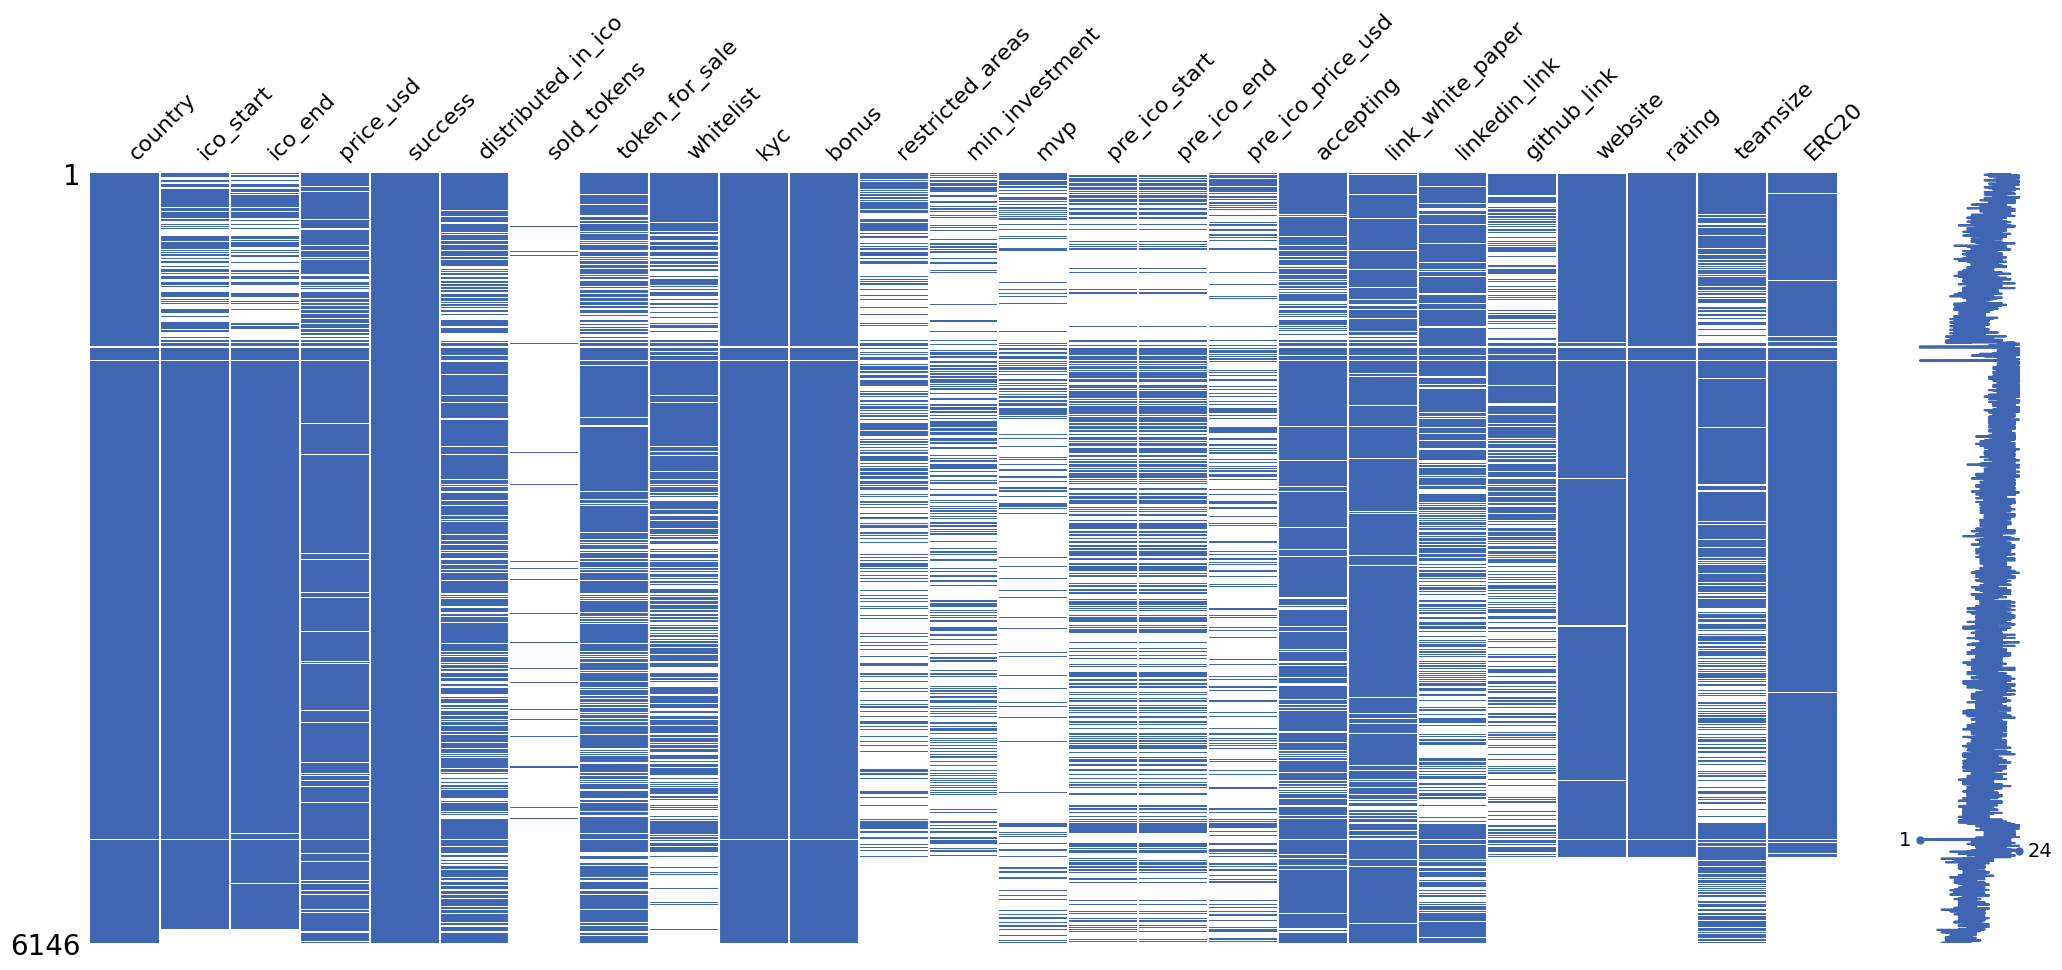

In [29]:
# Create figure with larger size for better readability
plt.figure(figsize=(12, 2))
ax = msno.bar(data, 
              color="green", 
              sort="descending")     # Sort bars by completeness
# Adjust bar width after plotting
for patch in ax.patches:
    patch.set_width(0.85)
# Calculate and add percentage labels
for container in ax.containers:
    # Get heights from the rectangles
    heights = [rect.get_height() for rect in container]
    # Add percentage labels on top of each bar
    ax.bar_label(container, 
                 labels=[f'{(height/1)*100:.1f}%' for height in heights],
                 padding=-15)
#add mid line (50% line) 
plt.axhline(y=0.5, color='orange', linestyle='--', label='50% Completeness')

# Add legend in the middle right
plt.text(0.9, 0.55, '50% Completeness', color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Mapa de calor de valores nulos
msno.heatmap(data, cmap="viridis")  # Muestra correlación de nulos entre columnas
plt.show()

# Matriz de valores nulos
msno.matrix(data, color=(0.25, 0.4, 0.7))  # Muestra distribución de los valores faltantes
plt.show()

### Price columns

In [30]:
# Filter non-numeric values from price_usd column
def is_numeric(x):
    try:
        float(x)
        return False
    except:
        return True

# Get unique non-numeric values
non_numeric_prices = data['price_usd'][data['price_usd'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats(price_usd):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats(price_usd):
- 1 KBX = 0.00011 ETH
- 1 TPLAY = 0.0012 ETH
- 1 DGO = 0.0004705882 ETH
- 1 HIX = 0.01 EUR
- 1 KIMERA = 0.00036 ETH
- 1 RLZ = 0.0002 ETH
- 1 BILL = 1 XLM
- 1 TRE = 0.0001 ETH
- 1 BATT = 0.000033 ETH
- 1 CCR = 0.0002 ETH
- 1 InBit = 0.01 EUR
- 1 TRU = 0.0008888889 ETH
- 1 ICX = 400 STG
- 1 AXT = 0.00025 ETH
- 1 JPT = 0.4 EUR
- 1 SYM = 0.00023697 ETH
- 1 MARA = 0.134 EUR
- 1 SPRING = 0.00002 ETH
- 1 BHM = 0.5 EUR
- 1 MDR = 0.0004 ETH
- 1 SQUID = 0.15 GBP
- 1 RENC = 0.001 ETH
- 1 BLOCK = 0.0001 ETH
- 1 BOOK = 0.1 EUR
- 1 TMED = 0.0000125 ETH
- 1 TBE = 0.000125 ETH
- 1 URP = 0.025 EUR
- 1 NAME = 0.00005 ETH
- 1 ABT Token = 0.000333 ETH
- 1 ARIA = 0.000035 BTC
- 1 GRD = 0.00005 ETH
- 1 MONI = 1 ETH
- 1 TTR = 0.0006666667 ETH
- 1 XSR = 0.0002 ETH
- 1 AMEC = 0.00025 ETH
- 1 ATLS = 0.0001 ETH
- 1 BSSX = 0.0001 ETH
- 1 mHLX = 0.02 EUR
- 1 jNetCoin = 0.0001 BTC
- 1 CATER = 0.0001470588 ETH
- 1 SPL = 0.01 ETH
- 1 Kibble/KIBL = 1.05 ETH
- 1 VTY = 0.0000

In [31]:
# Filter non-numeric values from min_investment column
# Get unique non-numeric values
non_numeric_prices = data['min_investment'][data['min_investment'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats (min_investment):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats (min_investment):
- 50 USD
- 100 USD
- 0.10 USD
- 1 ETH
- 100 HASH
- 10 EUR
- 1 USD
- 0.1 ETH
- 100 EUR
- 0.01 ETH
- 0.5 ETH
- 0.02 ETH
- 500 BFC
- 500 BNR
- 1000 USD
- 1,000 USD
- 7 ETH
- 0.25 ETH
- 1,000 PLS
- 10 USD
- 150 EUR
- 0.223 ETH
- 5,000 USD
- 1 NEO
- 300 ICX
- 200 SWG
- 0.0025 ETH
- 100 YON
- 0.2 ETH
- 0.15 ETH
- 25 ETH
- 200 USD
- 500 USD
- 5 USD
- 30 BXM
- 0.05 ETH
- 15 CONM
- 10 Deed
- 150 USD
- 0.20 ETH
- 50 EUR
- 30,000 VET
- 1,000 REG
- 0.4ETH
- 0,1 ETH
- 100 UGT
- 60 USD
- 250 USD
- 100,000 USD
- 50 BMK
- 10.000 USD
- 20 USD
- 10,000 USD
- 500 HALA
- 100 ICOIN
- 20,000 USD
- 300 USD
- 60 EUR
- 100 DOMI
- presale: 1,000 USD / crowdsale: 100 USD
- 15 EUR
- 30,000 USD
- 1,000 MERO
- 0.001 ETH
- 500 $
- 5000 USD
- 0.3 ETH
- 100 CRN
- 5 ETH
- none
- 300 EUR
- 80 USDT
- 0.1 BTC
- 5 GBR
- 2 ETH
- 1,000 ZAZA
- 0.03 ETH
- 20 HRBE
- 0.47 ETH
- 500 ZNC
- 30 USD
- 100 BCCN
- 0.04 ETH
- 25 USD
- 15 USD
- 1 DEO = 0.5 USD
- 1 Neo
- 3,000 EUR
- 300 E

In [32]:
# Filter non-numeric values from pre_ico_price_usd column
# Get unique non-numeric values
non_numeric_prices = data['pre_ico_price_usd'][data['pre_ico_price_usd'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats (pre_ico_price_usd):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats (pre_ico_price_usd):
- 1 2GT = 0.05 EUR
- 1 PAX = 0.5 EUR
- 1 ETH = 6000 QUA
- 1 BNR = 0.0001 ETH
- 1 KBX = 0.00011 ETH
- 1 TPLAY = 0.0009 ETH
- 1 ETH = 5,000 CEN
- 1 CTY = 0.0075 EUR
- 1 DYNO = 0.0000636 ETH
- 1 SilkRoadCoin / SRC = 0.8 EUR
- 0.04 EUR
- 1 RDT = 0.001 ETH
- 1 ETH = 12,500 YDST
- 1 ICX = 400 STG
- 1 MARA = 0.10 EUR
- 14 000MCC = 1 ETH
- 1 RLP = 0.0008 ETH
- 1 BHM = 0.22 EUR
- 1 Tellus = 0.08 EUR
- 1 NUK = 0.000004 ETH
- 1 SQUID = 0.075 GBP
- 1 EHF = 0.006 ETH
- 1 ETH = 1500 ELET
- 1 ETH = 35,000 LTS
- 1 TWC = 0.0002 ETH
- 1 ABT Token = 0.000333 ETH
- 1 ETH = 24,000 GRD
- 1 ETH = 7,500 MDT
- 1 MOVE = 0.00167 ETH
- 1 OPP = 0.0002 ETH
- 1 AMEC = 0.00025 ETH
- 1 BALT = 0.00020 ETH
- 1 OX = 0.0004 ETH
- 1 ETH = 10,000 BSSX
- 1 BRICK =  0.000550 ETH
- 1 cPay = 0.1 EUR
- 1 DSTT = 0.00025 ETH
- 1 mHLX = 0.015 EUR
- 1 INK = 0.008695652173 QTUM
- 1 ETH = 10000 PLAY
- 1 ETH = 230 PEF
- 1 ETH = 7,000 AFL
- 1 HBY = 0.001 ETH
- 1 ETH = 3,000 MFR
- 1 M

#### Function to parse price columns (pre_ico_price_usd, price_usd, min_invesment)

In [33]:
def parse_price(price_str):
    """
    Parse a price string and return (value, currency).
    Returns (None, None) if parsing fails.
    """
    if pd.isnull(price_str):
        return None, None
    
    # Clean up the string
    price_str = price_str.strip()
    
    # If the format is like "1 TOKEN = 0.15 GBP", we take the right side.
    if '=' in price_str:
        parts = price_str.split('=')
        price_str = parts[-1].strip()
    
    # Regex to match a number (including scientific notation) and an optional currency code
    match = re.search(r'([0-9\.Ee+-]+)\s*([A-Za-z]+)?', price_str)
    if match:
        try:
            value = float(match.group(1))
        except ValueError:
            value = None
        # If no currency is found, assume USD (or decide based on context)
        currency = match.group(2).upper() if match.group(2) else 'USD'
        return value, currency
    else:
        return None, None

# Example:
example_prices = [
    "0.01", "3.91E-02", "NA", "1", 
    "1 SQUID = 0.15 GBP", "1 RENC = 0.001 ETH", "1 BLOCK = 0.0001 ETH"
]
for p in example_prices:
    print(p, "->", parse_price(p))


0.01 -> (0.01, 'USD')
3.91E-02 -> (0.0391, 'USD')
NA -> (None, None)
1 -> (1.0, 'USD')
1 SQUID = 0.15 GBP -> (0.15, 'GBP')
1 RENC = 0.001 ETH -> (0.001, 'ETH')
1 BLOCK = 0.0001 ETH -> (0.0001, 'ETH')


#### Parse price_usd

In [34]:
# Apply the parse_price function and create separate columns for price and currency
data[['price_value', 'price_currency']] = pd.DataFrame(
    data['price_usd'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed prices:")
print(data[['price_usd', 'price_value', 'price_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['price_currency'].value_counts(dropna=False),
    'Percentage': data['price_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed prices:
  price_usd  price_value price_currency
0      0.01         0.01            USD
1       0.1         0.10            USD
2      0.14         0.14            USD
3       0.1         0.10            USD
4      0.06         0.06            USD


,Count,Percentage
price_currency,,
USD,5495,89.41%
None,484,7.88%
ETH,123,2.0%
EUR,15,0.24%
BTC,5,0.08%
XLM,4,0.07%
GBP,2,0.03%
TRX,2,0.03%
KRW,1,0.02%


#### Parse min_investment

In [35]:
# Apply the parse_price function and create separate columns for price and currency
data[['min_investment_value', 'min_investment_currency']] = pd.DataFrame(
    data['min_investment'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed min investment:")
print(data[['min_investment', 'min_investment_value', 'min_investment_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['min_investment_currency'].value_counts(dropna=False),
    'Percentage': data['min_investment_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed min investment:
  min_investment  min_investment_value min_investment_currency
0         50 USD                  50.0                     USD
1            NaN                   NaN                    None
2        100 USD                 100.0                     USD
3       0.10 USD                   0.1                     USD
4          1 ETH                   1.0                     ETH


,Count,Percentage
min_investment_currency,,
None,4163,67.74%
ETH,959,15.6%
USD,673,10.95%
EUR,53,0.86%
BTC,31,0.5%
...,...,...
CEDEX,1,0.02%
CWR,1,0.02%
ETM,1,0.02%


#### Parse pre_ico_price_usd

In [36]:
# Apply the parse_price function and create separate columns for price and currency
data[['pre_ico_price_value', 'pre_ico_price_currency']] = pd.DataFrame(
    data['pre_ico_price_usd'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed min investment:")
print(data[['pre_ico_price_usd', 'pre_ico_price_value', 'pre_ico_price_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['pre_ico_price_currency'].value_counts(dropna=False),
    'Percentage': data['pre_ico_price_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed min investment:
  pre_ico_price_usd  pre_ico_price_value pre_ico_price_currency
0          5.00E-03                0.005                    USD
1               NaN                  NaN                   None
2               NaN                  NaN                   None
3               0.1                0.100                    USD
4              0.03                0.030                    USD


,Count,Percentage
pre_ico_price_currency,,
None,4483,72.94%
USD,1547,25.17%
ETH,58,0.94%
EUR,20,0.33%
CHF,2,0.03%
USDT,1,0.02%
GRD,1,0.02%
CAM,1,0.02%
LANC,1,0.02%


### Export pre dataset

In [37]:
#export to excel all the dataset with all the changes
# data.to_excel('ICO_data_eda.xlsx', index=False)

## Countries

C:\Users\luish\AppData\Local\Temp\ipykernel_20208\3640160033.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette=pastel_blue_palette)


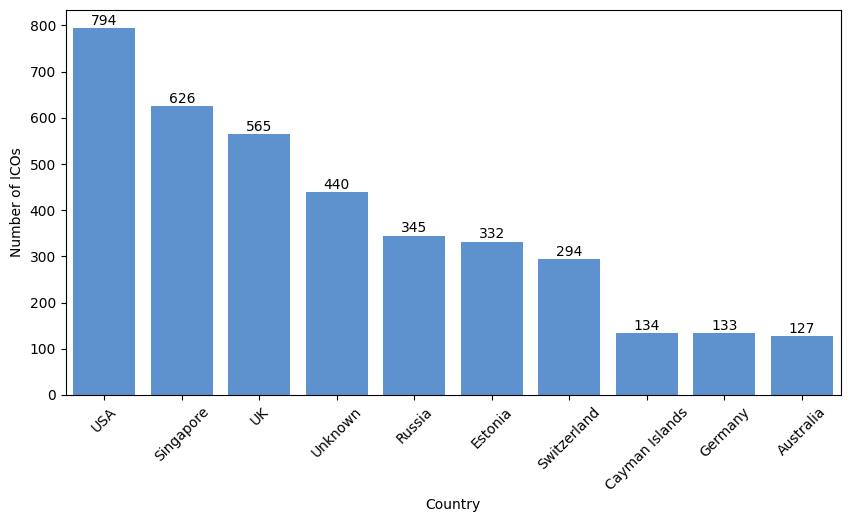

In [68]:
# determine the top 10 countries with more number of ICOs and plot in a barr chart
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
# Define pastel blue palette from lighter to darker
pastel_blue_palette = ["#E3F2FD", "#BBDEFB", "#90CAF9", "#64B5F6", "#42A5F5", 
                      "#2196F3", "#1E88E5", "#1976D2", "#1565C0", "#0D47A1"]
pastel_blue_palette = ["#4A90E2"] * 10  # Single professional pastel blue color

sns.barplot(x=top_countries.index, y=top_countries.values, palette=pastel_blue_palette)
# add labels to the bars
for i, v in enumerate(top_countries.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
#plt.title('Top 10 Countries with Most ICOs')
plt.xlabel('Country')
plt.ylabel('Number of ICOs')
plt.xticks(rotation=45)
plt.show()
# save a variable with the top 5 countries excluding "UnKnown"
top_countries = data['country'].value_counts().head(6)
top_5_countries = top_countries[top_countries.index != 'Unknown']




# Data Preparation

## Data Cleaning

#### Function to get cryto rate conversion to USD

In [53]:
def get_crypto_rate_cc(crypto: str, date: datetime) -> float:
    """
    Get historical price of a cryptocurrency in USD using CryptoCompare API.
    
    Parameters:
        crypto (str): Cryptocurrency symbol, e.g., 'ETH'.
        date (datetime): Date for which to get the historical price.
        
    Returns:
        float: Price in USD or None if data is unavailable.
    """
    # Convert the date to a Unix timestamp (in seconds)
    timestamp = int(date.timestamp())
    
    # Construct the API URL
    url = f"https://min-api.cryptocompare.com/data/pricehistorical"
    params = {
        'fsym': crypto.upper(),  # from symbol, e.g., ETH
        'tsyms': 'USD',          # target currency: USD
        'ts': timestamp          # historical timestamp
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raises an error for bad responses
        data = response.json()
        # Expected data format: { "ETH": { "USD": 400.0 } }
        return data.get(crypto.upper(), {}).get('USD', None)
    except Exception as e:
        print(f"Error retrieving data for {crypto} on {date.strftime('%Y-%m-%d')}: {e}")
        return None

# Example usage:
example_date = datetime(2017,12, 25)
rate = get_crypto_rate_cc('ETH', example_date)
print(f"Historical rate for ETH on {example_date.strftime('%Y-%m-%d')}: {rate} USD")

Historical rate for ETH on 2017-12-25: 723.14 USD


#### Function to convert to USD

In [39]:
def convert_to_usd(row, value_col, currency_col, date_col='ico_end'):
    """
    Convert any price value to USD based on currency and date
    
    Parameters:
        row: DataFrame row
        value_col: Name of column containing the value to convert
        currency_col: Name of column containing the currency
        date_col: Name of column containing the date (default: 'ico_end')
    Returns:
        float: Price in USD
    """
    # If already in USD, return the value
    if row[currency_col] == 'USD':
        return row[value_col]
    
    if pd.isna(row[value_col]) or pd.isna(row[date_col]):
        return None
       
    # Convert date string to datetime if needed
    if isinstance(row[date_col], str):
        try:
            date = pd.to_datetime(row[date_col])
        except:
            return None
    else:
        date = row[date_col]
    
    # Add rate limiting to avoid API throttling
    time.sleep(0.1)  # 100ms delay between requests

    # Get conversion rate
    rate = get_crypto_rate_cc(row[currency_col], date)
    
    if rate is not None:
        return row[value_col] * rate
    return None

### Apply conversion to price_usd, min_invesment

In [40]:
# Apply conversion to price_usd
data['price_usd_converted'] = data.apply(
    lambda row: convert_to_usd(row, 'price_value', 'price_currency'), 
    axis=1
)

# Apply conversion to min_investment
data['min_investment_usd_converted'] = data.apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'),
    axis=1
)

# Display results
print("Sample of converted values:")
print(data[[
    'ico_end',
    'price_value', 'price_currency', 'price_usd_converted',
    'min_investment_value', 'min_investment_currency', 'min_investment_usd_converted'
]].head())

# Check conversion statistics
print("\nConversion statistics:")
print("Price USD conversion success rate: {:.2f}%".format(
    100 * data['price_usd_converted'].notna().mean()
))
print("Min Investment USD conversion success rate: {:.2f}%".format(
    100 * data['min_investment_usd_converted'].notna().mean()
))

Sample of converted values:
     ico_end  price_value price_currency  price_usd_converted  \
0 2020-12-31         0.01            USD                 0.01   
1 2020-12-31         0.10            USD                 0.10   
2 2020-12-31         0.14            USD                 0.14   
3 2021-01-31         0.10            USD                 0.10   
4        NaT         0.06            USD                 0.06   

   min_investment_value min_investment_currency  min_investment_usd_converted  
0                  50.0                     USD                          50.0  
1                   NaN                    None                           NaN  
2                 100.0                     USD                         100.0  
3                   0.1                     USD                           0.1  
4                   1.0                     ETH                           NaN  

Conversion statistics:
Price USD conversion success rate: 89.64%
Min Investment USD conversion succe

### Export excel data cleaned

In [41]:
data.to_excel('ico_data_cleaned.xlsx', 
              index=False,              # Don't include index
              sheet_name='ICO Data',    # Name of the worksheet
              engine='openpyxl',        # Excel engine to use
              float_format="%.4f")      # Format for floating point numbers

### Reapply to min_invesment with excel_rev1

In [52]:
# read the excel file ico_data_cleaned_rev1.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev1.xlsx', engine='openpyxl')
# apply the conversion to min_investment only rows with the column try_again == yes
mask = data_cleaned['try_again'] == 'yes'

# Apply conversion only to masked rows
data_cleaned.loc[mask, 'min_investment_usd_converted'] = data_cleaned[mask].apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'), 
    axis=1
)
# Save the updated dataset
data_cleaned.to_excel('ico_data_cleaned_rev2.xlsx', 
                     index=False,
                     sheet_name='ICO Data',
                     engine='openpyxl',
                     float_format="%.4f")

In [54]:
# read the excel file ico_data_cleaned_rev3.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev3.xlsx', engine='openpyxl')
# apply the conversion to min_investment only rows with the column try_again == yes
mask = data_cleaned['try_again_2'] == 'yes'

# Apply conversion only to masked rows
data_cleaned.loc[mask, 'min_investment_usd_converted'] = data_cleaned[mask].apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'), 
    axis=1
)
# Save the updated dataset
data_cleaned.to_excel('ico_data_cleaned_rev4.xlsx', 
                     index=False,
                     sheet_name='ICO Data',
                     engine='openpyxl',
                     float_format="%.4f")

### Read data cleaned

In [138]:
# read the excel file ico_data_cleaned_rev4.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev5.xlsx', engine='openpyxl')


### Cleaning min_investment_usd_converted, price_usd_converted

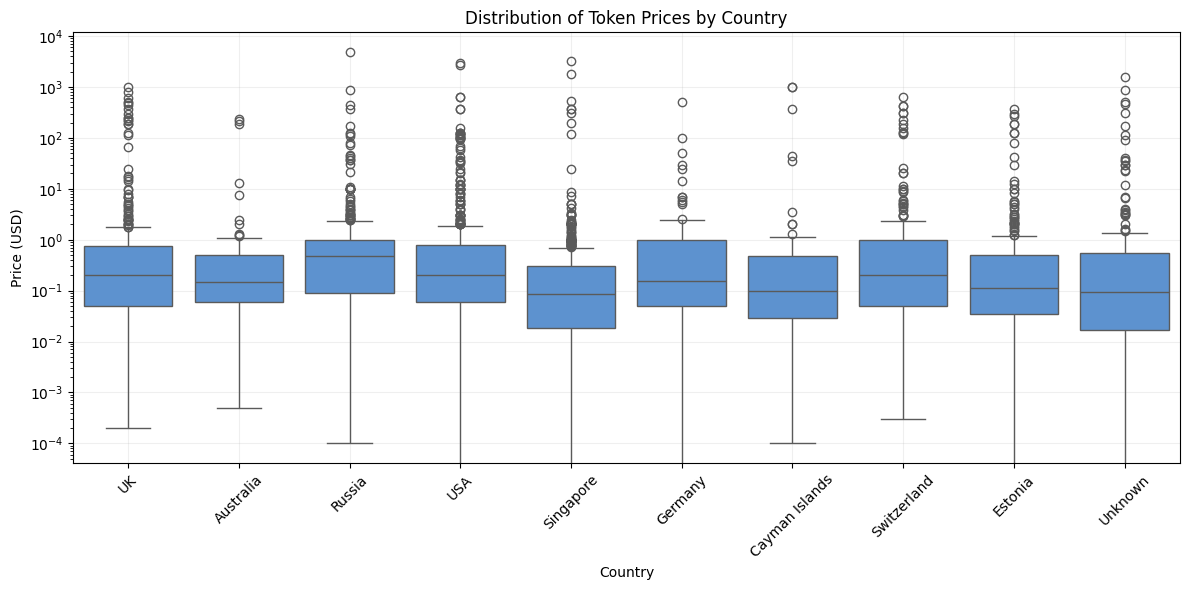


Price Statistics by Country (USD):
                count   mean     std  min   25%   50%   75%      max
country                                                             
Australia       117.0   5.88   33.56  0.0  0.06  0.15  0.50   230.77
Cayman Islands  124.0  20.09  130.47  0.0  0.03  0.10  0.48  1000.00
Estonia         316.0   6.00   35.59  0.0  0.03  0.11  0.50   375.00
Germany         117.0   6.77   47.35  0.0  0.05  0.16  1.00   501.00
Russia          313.0  25.03  283.20  0.0  0.09  0.47  1.00  4900.00
Singapore       562.0  12.71  159.60  0.0  0.02  0.09  0.30  3229.18
Switzerland     276.0  11.98   62.44  0.0  0.05  0.20  1.00   623.00
UK              519.0  12.51   78.33  0.0  0.05  0.20  0.74  1000.00
USA             699.0  14.58  159.56  0.0  0.06  0.20  0.80  3000.00
Unknown         313.0  14.24  110.94  0.0  0.02  0.10  0.55  1585.43


In [139]:
# impute the missing values in the column min_investment_usd_converted with 0
data_cleaned['min_investment_usd_converted'] = data_cleaned['min_investment_usd_converted'].fillna(0)

# Create figure with proper size
plt.figure(figsize=(12, 6))

# Get top 5 countries by frequency (excluding 'Unknown')
top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()

# Create boxplot for price_usd_converted by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='price_usd_converted',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Token Prices by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)

# Use log scale for better visualization of price distribution
plt.yscale('log')

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by country
print("\nPrice Statistics by Country (USD):")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['price_usd_converted']
      .describe()
      .round(2))


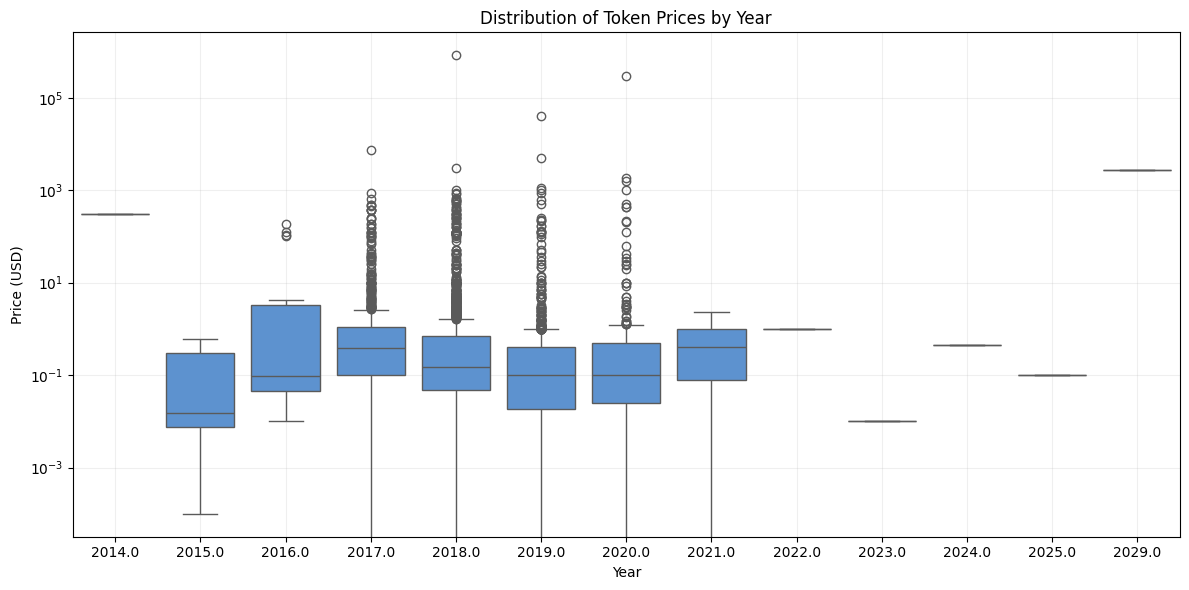


Price Statistics by Year (USD):
           count     mean       std      min      25%      50%      75%  \
ico_year                                                                  
2014.0       1.0   311.00       NaN   311.00   311.00   311.00   311.00   
2015.0       3.0     0.21      0.34     0.00     0.01     0.02     0.31   
2016.0      18.0    29.24     58.00     0.01     0.04     0.09     3.21   
2017.0     711.0    22.27    289.67     0.00     0.10     0.39     1.10   
2018.0    2753.0   308.51  15790.04     0.00     0.05     0.15     0.68   
2019.0    1074.0    47.60   1212.21     0.00     0.02     0.10     0.40   
2020.0     426.0   719.98  14534.88     0.00     0.03     0.10     0.50   
2021.0      27.0     0.53      0.54     0.00     0.08     0.40     1.00   
2022.0       1.0     1.00       NaN     1.00     1.00     1.00     1.00   
2023.0       1.0     0.01       NaN     0.01     0.01     0.01     0.01   
2024.0       1.0     0.45       NaN     0.45     0.45     0.45     

In [140]:
# Extract year from ico_end and create boxplots by year
plt.figure(figsize=(12, 6))

# Create year column
data_cleaned['ico_year'] = pd.to_datetime(data_cleaned['ico_end']).dt.year

# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='price_usd_converted',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Token Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=0)

# Use log scale for better visualization
plt.yscale('log')

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by year
print("\nPrice Statistics by Year (USD):")
print(data_cleaned.groupby('ico_year')['price_usd_converted']
      .describe()
      .round(2))

In [141]:
# Store original number of nulls for comparison
original_nulls = data_cleaned['price_usd_converted'].isna().sum()

# Years to impute
years_to_impute = [2014, 2015, 2021, 2022, 2023, 2024, 2025, 2029]

# Calculate means by year for the specified years
year_means = data_cleaned[data_cleaned['ico_year'].isin(years_to_impute)].groupby('ico_year')['price_usd_converted'].mean()

# Impute values for each year
for year in years_to_impute:
    year_mask = (data_cleaned['ico_year'] == year) & (data_cleaned['price_usd_converted'].isna())
    data_cleaned.loc[year_mask, 'price_usd_converted'] = year_means[year]

# Calculate number of imputations
final_nulls = data_cleaned['price_usd_converted'].isna().sum()
total_imputations = original_nulls - final_nulls

# Print results
print(f"Original missing values: {original_nulls}")
print(f"Final missing values: {final_nulls}")
print(f"Total imputations made: {total_imputations}")
print("\nMean values used for imputation by year:")
print(year_means.round(2))

Original missing values: 634
Final missing values: 634
Total imputations made: 0

Mean values used for imputation by year:
ico_year
2014.0     311.00
2015.0       0.21
2021.0       0.53
2022.0       1.00
2023.0       0.01
2024.0       0.45
2025.0       0.10
2029.0    2758.07
Name: price_usd_converted, dtype: float64


In [142]:

# discard rows with price_usd_converted == 0
data_cleaned = data_cleaned[data_cleaned['price_usd_converted'] != 0]

### Cleaning sold_tokens, token_for_sale, distributed_in_ico

In [143]:
# discard column sold_tokens y token_for_sale : no enoguh data
if 'sold_tokens' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['sold_tokens'])
if 'token_for_sale' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['token_for_sale'])

# Correct the column distributed_in_ico based on value ranges
data_cleaned['distributed_in_ico'] = data_cleaned['distributed_in_ico'].apply(
    lambda x: x/100 if (x > 1 and x <= 99) else (
        x/1000 if (x > 100 and x <= 999) else x
    )
)



count    4639.000000
mean        0.533651
std         0.215338
min         0.000000
25%         0.400000
50%         0.550000
75%         0.700000
max         1.000000
Name: distributed_in_ico, dtype: float64


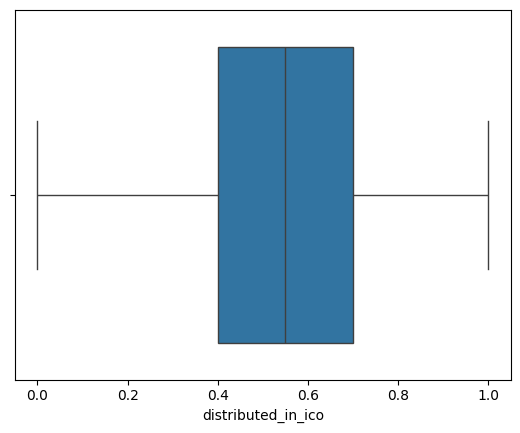

In [144]:
print(data_cleaned['distributed_in_ico'].describe())
sns.boxplot(x=data_cleaned['distributed_in_ico'])
plt.show()

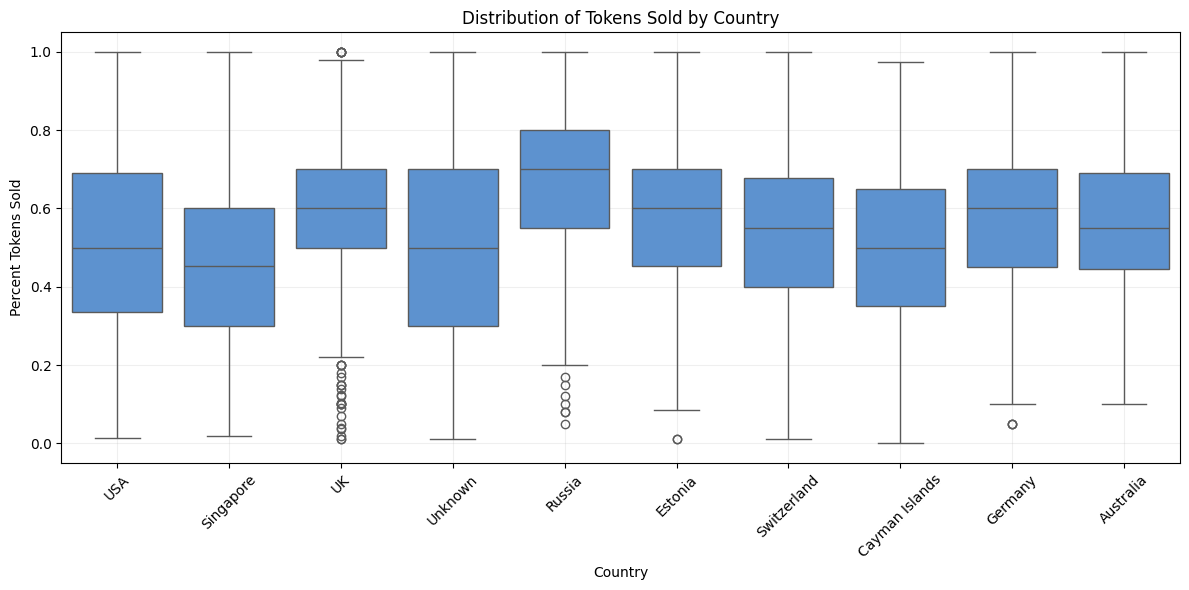


Percentage allocated to invertors by Country (USD):
                count  mean   std   min   25%   50%   75%   max
country                                                        
Australia       104.0  0.54  0.19  0.10  0.45  0.55  0.69  1.00
Cayman Islands  115.0  0.51  0.22  0.00  0.35  0.50  0.65  0.98
Estonia         290.0  0.57  0.19  0.01  0.45  0.60  0.70  1.00
Germany         107.0  0.56  0.22  0.05  0.45  0.60  0.70  1.00
Russia          224.0  0.66  0.18  0.05  0.55  0.70  0.80  1.00
Singapore       505.0  0.45  0.20  0.02  0.30  0.45  0.60  1.00
Switzerland     234.0  0.54  0.19  0.01  0.40  0.55  0.68  1.00
UK              441.0  0.57  0.20  0.01  0.50  0.60  0.70  1.00
USA             527.0  0.51  0.21  0.01  0.34  0.50  0.69  1.00
Unknown         263.0  0.49  0.24  0.01  0.30  0.50  0.70  1.00


In [145]:
plt.figure(figsize=(12, 6))

top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()

# Create boxplot for distributed_in_ico by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='distributed_in_ico',
            color='#4A90E2',
            order=top_countries)
plt.title('Distribution of Tokens Sold by Country')
plt.xlabel('Country')
plt.ylabel('Percent Tokens Sold')
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by country
print("\nPercentage allocated to invertors by Country (USD):")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['distributed_in_ico']
      .describe()
      .round(2))


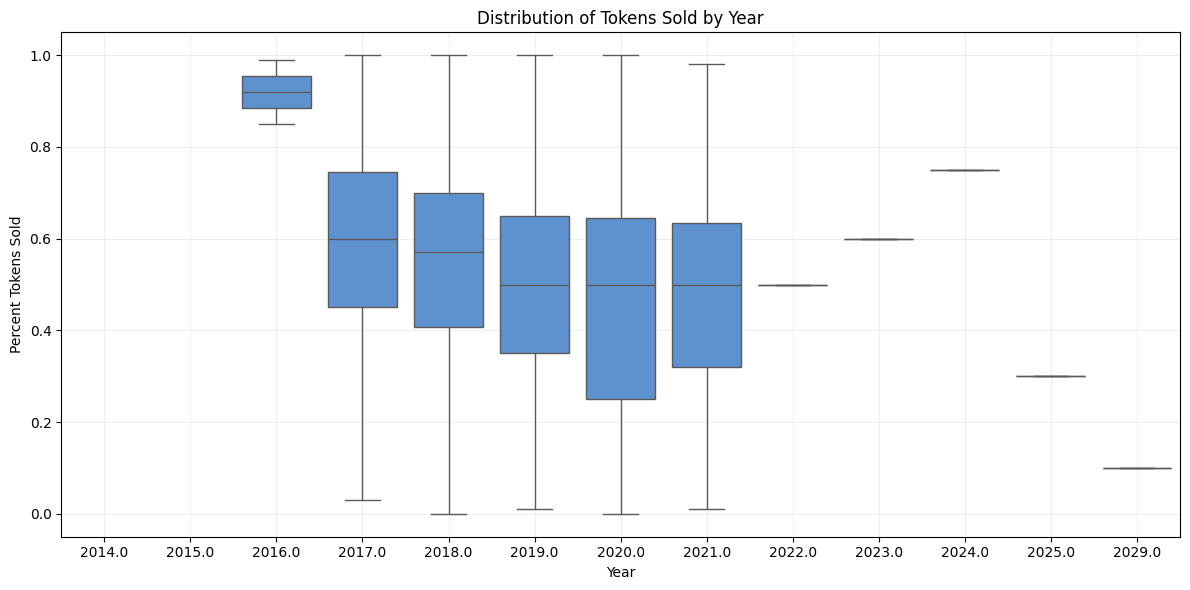


Percentage of Tokens Sold by Year:
           count  mean   std   min   25%   50%   75%   max
ico_year                                                  
2014.0       0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2015.0       0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2016.0       2.0  0.92  0.10  0.85  0.88  0.92  0.96  0.99
2017.0     375.0  0.58  0.21  0.03  0.45  0.60  0.74  1.00
2018.0    2283.0  0.56  0.20  0.00  0.41  0.57  0.70  1.00
2019.0     986.0  0.50  0.22  0.01  0.35  0.50  0.65  1.00
2020.0     379.0  0.45  0.25  0.00  0.25  0.50  0.64  1.00
2021.0      23.0  0.47  0.27  0.01  0.32  0.50  0.64  0.98
2022.0       1.0  0.50   NaN  0.50  0.50  0.50  0.50  0.50
2023.0       1.0  0.60   NaN  0.60  0.60  0.60  0.60  0.60
2024.0       1.0  0.75   NaN  0.75  0.75  0.75  0.75  0.75
2025.0       1.0  0.30   NaN  0.30  0.30  0.30  0.30  0.30
2029.0       1.0  0.10   NaN  0.10  0.10  0.10  0.10  0.10

Additional Statistics by Year:
-----------------------------------------------

In [146]:
# Extract year from ico_end and create boxplots by year
plt.figure(figsize=(12, 6))

# Create year column if not already present
data_cleaned['ico_year'] = pd.to_datetime(data_cleaned['ico_end']).dt.year

# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='distributed_in_ico',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Tokens Sold by Year')
plt.xlabel('Year')
plt.ylabel('Percent Tokens Sold')
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by year
print("\nPercentage of Tokens Sold by Year:")
print(data_cleaned.groupby('ico_year')['distributed_in_ico']
      .describe()
      .round(2))

# Additional statistics by year
print("\nAdditional Statistics by Year:")
print("-" * 50)
for year in sorted(data_cleaned['ico_year'].unique()):
    year_data = data_cleaned[data_cleaned['ico_year'] == year]['distributed_in_ico']
    if not year_data.empty:
        print(f"\nYear {year}:")
        print(f"Skewness: {year_data.skew():.3f}")
        print(f"Kurtosis: {year_data.kurtosis():.3f}")
        print(f"Number of ICOs: {len(year_data)}")

In [147]:
# impute the missing values in the column distributed_in_ico with the mean of each group by year of ico_end

# Store original number of nulls for comparison
original_nulls = data_cleaned['distributed_in_ico'].isna().sum()

# calculate the means by year for distributed_in_ico
year_means = data_cleaned.groupby('ico_year')['distributed_in_ico'].mean()
year_means

ico_year
2014.0         NaN
2015.0         NaN
2016.0    0.920000
2017.0    0.581612
2018.0    0.555663
2019.0    0.500925
2020.0    0.451032
2021.0    0.466087
2022.0    0.500000
2023.0    0.600000
2024.0    0.750000
2025.0    0.300000
2029.0    0.100000
Name: distributed_in_ico, dtype: float64

In [148]:
# impute the missing values in the column distributed_in_ico with the mean of each group by year of ico_end

# Store original number of nulls for comparison
original_nulls = data_cleaned['distributed_in_ico'].isna().sum()

# Calculate means by year for distributed_in_ico, excluding NaN years
year_means = data_cleaned[data_cleaned['ico_year'].notna()].groupby('ico_year')['distributed_in_ico'].mean()

# Impute values only for years with non-NaN means
for year in data_cleaned['ico_year'].dropna().unique():
    if not pd.isna(year_means[year]):  # Only impute if mean is not NaN
        year_mask = (data_cleaned['ico_year'] == year) & (data_cleaned['distributed_in_ico'].isna())
        data_cleaned.loc[year_mask, 'distributed_in_ico'] = year_means[year]

# Calculate number of imputations
final_nulls = data_cleaned['distributed_in_ico'].isna().sum()
total_imputations = original_nulls - final_nulls

# Print results
print(f"Original missing values: {original_nulls}")
print(f"Final missing values: {final_nulls}")
print(f"Total imputations made: {total_imputations}")
print("\nMean values used for imputation by year:")
print(year_means.round(2))

# Print years that had NaN means (skipped for imputation)
nan_years = year_means[year_means.isna()].index.tolist()
if nan_years:
    print("\nYears skipped due to NaN means:")
    print(sorted(nan_years))

Original missing values: 1481
Final missing values: 322
Total imputations made: 1159

Mean values used for imputation by year:
ico_year
2014.0     NaN
2015.0     NaN
2016.0    0.92
2017.0    0.58
2018.0    0.56
2019.0    0.50
2020.0    0.45
2021.0    0.47
2022.0    0.50
2023.0    0.60
2024.0    0.75
2025.0    0.30
2029.0    0.10
Name: distributed_in_ico, dtype: float64

Years skipped due to NaN means:
[2014.0, 2015.0]


### Cleaning rating

In [149]:
# exclude rows with rating NaN
data_cleaned = data_cleaned[data_cleaned['rating'].notna()]

### Cleaning teamsize, ERC20, bonus

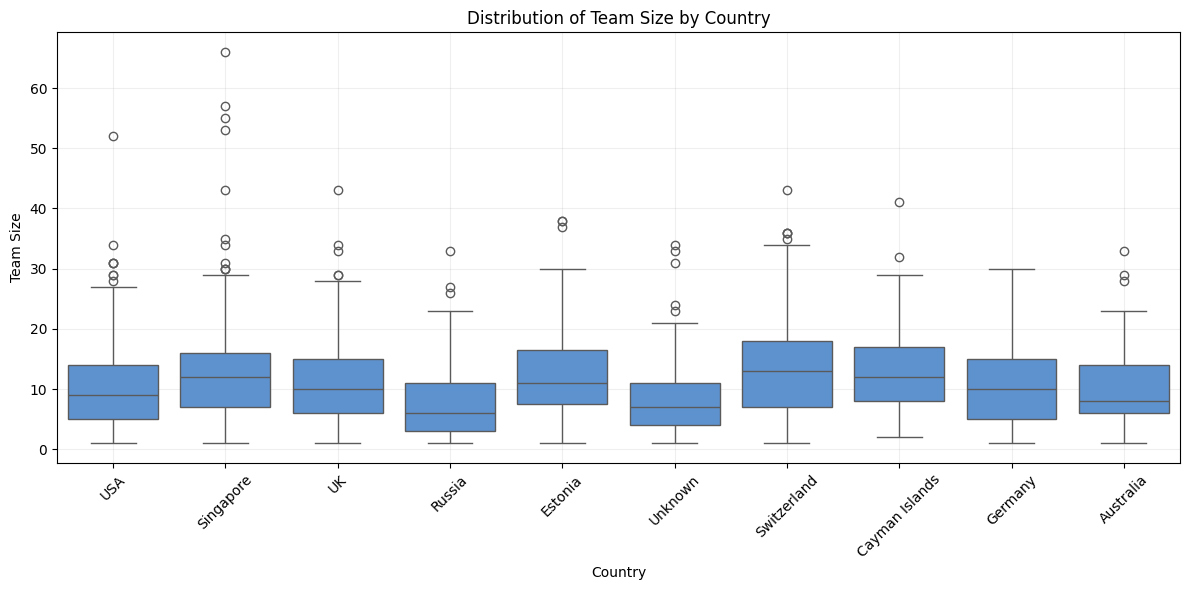


Team Size Statistics by Country:
                count   mean   std  min  25%   50%   75%   max
country                                                       
Australia        87.0  10.37  6.68  1.0  6.0   8.0  14.0  33.0
Cayman Islands  107.0  13.12  6.89  2.0  8.0  12.0  17.0  41.0
Estonia         259.0  12.44  6.94  1.0  7.5  11.0  16.5  38.0
Germany          93.0  10.68  6.59  1.0  5.0  10.0  15.0  30.0
Russia          201.0   7.48  5.70  1.0  3.0   6.0  11.0  33.0
Singapore       427.0  12.54  8.22  1.0  7.0  12.0  16.0  66.0
Switzerland     210.0  13.45  8.03  1.0  7.0  13.0  18.0  43.0
UK              394.0  10.65  6.52  1.0  6.0  10.0  15.0  43.0
USA             488.0   9.84  6.60  1.0  5.0   9.0  14.0  52.0
Unknown         124.0   8.46  6.39  1.0  4.0   7.0  11.0  34.0


In [150]:
# analize boxplot by country of teamsize
plt.figure(figsize=(12, 6))
# Get top 5 countries by frequency (excluding 'Unknown')
top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()
# Create boxplot for team_size by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='teamsize',
            color='#4A90E2',
            order=top_countries)
plt.title('Distribution of Team Size by Country')
plt.xlabel('Country')   
plt.ylabel('Team Size')
plt.xticks(rotation=45) 
# Add grid for better readability
plt.grid(True, alpha=0.2)   
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

# Print summary statistics by country
print("\nTeam Size Statistics by Country:")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['teamsize']
      .describe()
      .round(2))



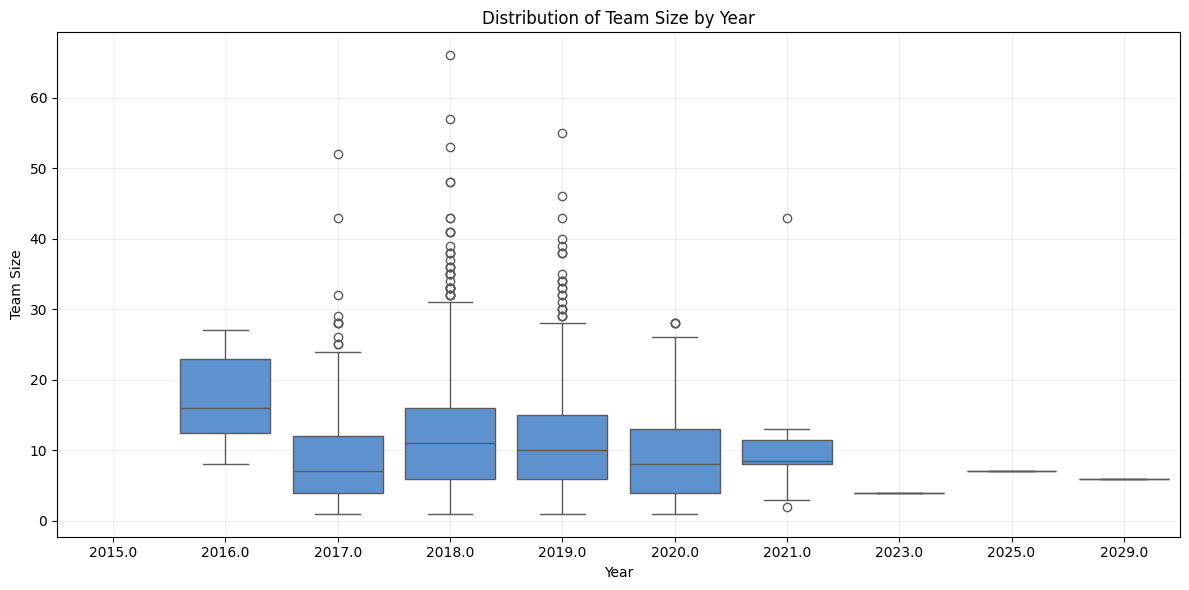


Team Size Statistics by Year:
           count   mean    std  min   25%   50%   75%   max
ico_year                                                   
2015.0       0.0    NaN    NaN  NaN   NaN   NaN   NaN   NaN
2016.0       7.0  17.43   7.09  8.0  12.5  16.0  23.0  27.0
2017.0     391.0   8.63   6.56  1.0   4.0   7.0  12.0  52.0
2018.0    2024.0  11.66   7.35  1.0   6.0  11.0  16.0  66.0
2019.0     829.0  11.13   7.32  1.0   6.0  10.0  15.0  55.0
2020.0     190.0   9.34   6.17  1.0   4.0   8.0  13.0  28.0
2021.0      10.0  11.60  11.56  2.0   8.0   8.5  11.5  43.0
2023.0       1.0   4.00    NaN  4.0   4.0   4.0   4.0   4.0
2025.0       1.0   7.00    NaN  7.0   7.0   7.0   7.0   7.0
2029.0       1.0   6.00    NaN  6.0   6.0   6.0   6.0   6.0


In [151]:
# boxplots by year
plt.figure(figsize=(12, 6))
# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='teamsize',
            color='#4A90E2')
# Customize the plot
plt.title('Distribution of Team Size by Year')
plt.xlabel('Year')
plt.ylabel('Team Size')
plt.xticks(rotation=0)
# Add grid for better readability
plt.grid(True, alpha=0.2)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()
# Print summary statistics by year
print("\nTeam Size Statistics by Year:")
print(data_cleaned.groupby('ico_year')['teamsize']
      .describe()
      .round(2))


In [152]:
# Impute the missing values in the column teamsize with the mean of each group by country
# Store original number of nulls for comparison
original_nulls = data_cleaned['teamsize'].isna().sum()
# Calculate means by country for teamsize
country_means = data_cleaned.groupby('country')['teamsize'].median()
# Impute values for each country
for country in data_cleaned['country'].unique():
    if not pd.isna(country_means[country]):  # Only impute if mean is not NaN
        country_mask = (data_cleaned['country'] == country) & (data_cleaned['teamsize'].isna())
        data_cleaned.loc[country_mask, 'teamsize'] = country_means[country]
# Calculate number of imputations
final_nulls = data_cleaned['teamsize'].isna().sum() 
total_imputations = original_nulls - final_nulls
# Print results
print(f"Original missing values: {original_nulls}")
print(f"Final missing values: {final_nulls}")
print(f"Total imputations made: {total_imputations}")
print("\nMean values used for imputation by country:")
print(country_means.round(2))
# Print countries that had NaN means (skipped for imputation)
nan_countries = country_means[country_means.isna()].index.tolist()
if nan_countries:
    print("\nCountries skipped due to NaN means:")
    print(sorted(nan_countries))


Original missing values: 1453
Final missing values: 8
Total imputations made: 1445

Mean values used for imputation by country:
country
Afghanistan     3.0
Andorra         4.0
Anguilla       15.0
Argentina       5.0
Armenia         6.0
               ... 
Venezuela       5.0
Vietnam         8.0
Zimbabwe       12.0
india           3.0
usa             NaN
Name: teamsize, Length: 136, dtype: float64

Countries skipped due to NaN means:
['Congo', 'French Polynesia', 'Honduras', 'Kuwait', 'Lesotho', 'San Marino', 'Tunisia', 'usa']


In [155]:
for col in ['ERC20', 'bonus', 'mvp']:
    data_cleaned[f'{col}_missing'] = data_cleaned[col].isna().astype(int)
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)   # mode imputation


C:\Users\luish\AppData\Local\Temp\ipykernel_20208\801192651.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)   # mode imputation
C:\Users\luish\AppData\Local\Temp\ipykernel_20208\801192651.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [160]:
# success column: Y:1, N:0
data_cleaned['success'] = data_cleaned['success'].map({'Y': 1, 'N': 0})

In [161]:
data_cleaned.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,whitelist,kyc,bonus,restricted_areas,...,pre_ico_price_currency,price_usd_converted,min_investment_usd_converted,Min_investment_edited,try_again,try_again_2,ico_year,ERC20_missing,bonus_missing,mvp_missing
0,India,2020-08-10,2020-12-31,0.01,1,0.5,Yes,1.0,1.0,"Pakistan, Turkey, Somalia, Sirya, Sudan",...,USD,0.01,50.0,NaN,NaN,NaN,2020.0,0,0,0
1,Cyprus,2020-08-01,2020-12-31,0.1,0,0.6,No,1.0,0.0,USA,...,NaN,0.10,0.0,NaN,NaN,NaN,2020.0,0,0,0
2,UK,2019-03-01,2020-12-31,0.14,1,0.5,No,0.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,NaN,0.14,100.0,NaN,NaN,NaN,2020.0,0,0,0
3,UK,2020-06-25,2021-01-31,0.1,0,0.5,Yes,1.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,USD,0.10,0.1,NaN,NaN,NaN,2021.0,0,0,0
4,Seychelles,NaT,NaT,0.06,0,0.4,Yes,1.0,1.0,"USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES",...,USD,0.06,0.0,NaN,NaN,NaN,NaN,0,0,0


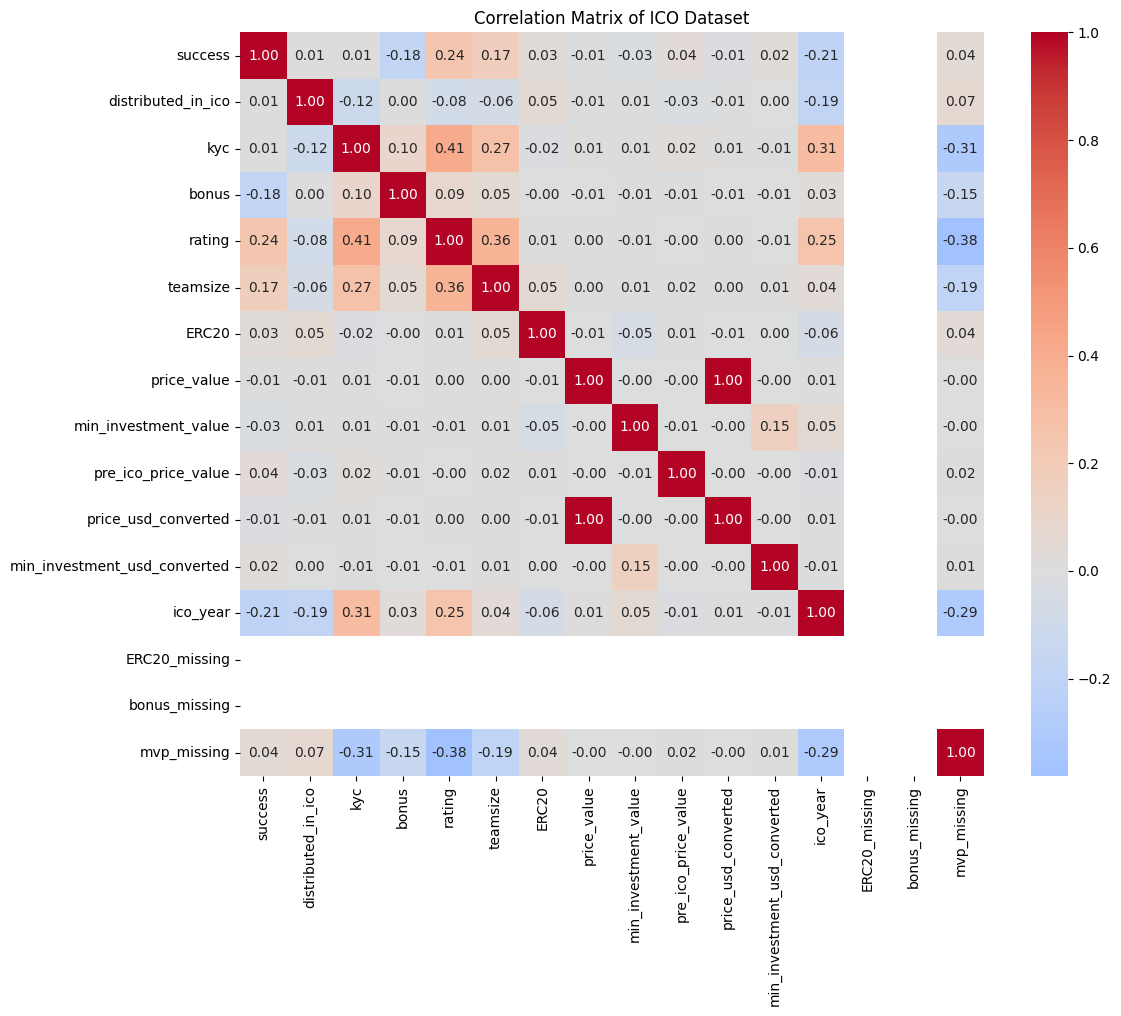

In [162]:
# correlatioin matrix of all numeric varaibles
# Select only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64', 'int']).columns

# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data_cleaned[numeric_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt=".2f",           # Format numbers to 2 decimal places
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            square=True)         # Make cells square

# Customize plot
plt.title('Correlation Matrix of ICO Dataset')
plt.tight_layout()              # Adjust layout to prevent label cutoff

# Show plot
plt.show()


## Data Featuring